<a href="https://colab.research.google.com/github/LucianaKimura/DataScience/blob/main/Credito_Algorithms_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms Machine Learning

In [2]:
!pip install plotly --upgrade

     |████████████████████████████████| 26.5 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
X_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados Pre-Processados/X_Credit.csv')

In [26]:
Y_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados Pre-Processados/Y_Credit.csv')

In [20]:
X_credit = X_credit.values

In [27]:
Y_credit = Y_credit.values

In [28]:
Y_credit = Y_credit.ravel()

In [30]:
Y_credit

array([0., 1., 1., ..., 1., 0., 0.])

✋ Importing the train_test_split to divide the DB between a training data set and a test data set. ⬇ 

In [6]:
from sklearn.model_selection import train_test_split

In [31]:
X_credit_train, X_credit_test, Y_credit_train, Y_credit_test = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

The random_state must be defined as any given number to assure that the same data will be generated every time, so the test can be redone.

In [32]:
X_credit_train.shape

(24425, 25)

In [33]:
Y_credit_train.shape

(24425,)

Saving the variables

In [34]:
import pickle

In [35]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_train, Y_credit_train, X_credit_test, Y_credit_test], f)

The second argument is 'wb'. The w means that you'll be writing to the file, and b refers to binary mode. 

## Naive Bayes

- In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier). 
- Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features. 
  - Source: https://en.wikipedia.org/wiki/Naive_Bayes_classifier


- It uses:
  - probability(class)
  - probability(each value for the predictors - independent variables)
  - combined probability - probability of each class given a value for a predictor.
- Multiplying the combined probablity they define the most likely class value (classification) giving the values for the predictors.
- Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes algorithm (if you multiply any probablity by 0 it will not consider the other values). It adds new registers to correct the lack of data.

- Pros
  - Fast
  - Easy to understand the results
  - Works with many dimensions (attributes)
  - Good results with small data bases
- Con
  - Consider the attributes independents - not necessarily true.
   

✋ Importing the library sklearn.naive_bayes to use the tools for the algorithm. ⬇ 

In [36]:
from sklearn.naive_bayes import GaussianNB

Gaussian - Normal (most used statistic distribution for regular problems)

In [37]:
with open('credit.pkl', mode = 'rb') as f:
  X_credit_train, Y_credit_train, X_credit_test, Y_credit_test = pickle.load(f)

The second argument is 'rb'. The r means that you'll be reading the file, and b refers to binary mode

In [38]:
nb_credito = GaussianNB()
nb_credito.fit(X_credit_train, Y_credit_train)

GaussianNB()

In [39]:
prev = nb_credito.predict(X_credit_test)

In [40]:
prev

array([1., 0., 0., ..., 0., 0., 0.])

In [41]:
Y_credit_test

array([1., 0., 1., ..., 1., 0., 0.])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
accuracy_score(Y_credit_test, prev)

0.8414394497666421

In [46]:
confusion_matrix(Y_credit_test, prev)

array([[6053,  390],
       [ 901,  798]])

In [47]:
from yellowbrick.classifier import ConfusionMatrix

0.8414394497666421

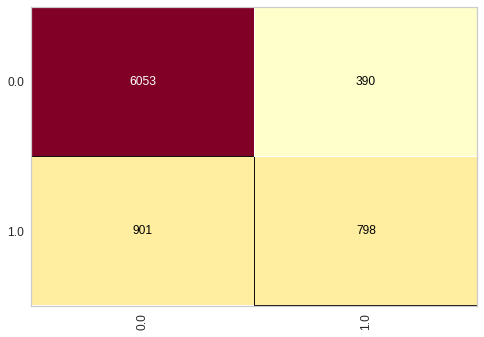

In [48]:
cm = ConfusionMatrix(nb_credito)
cm.fit(X_credit_train, Y_credit_train)
cm.score(X_credit_test, Y_credit_test)

In [50]:
print(classification_report(Y_credit_test, prev))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6443
         1.0       0.67      0.47      0.55      1699

    accuracy                           0.84      8142
   macro avg       0.77      0.70      0.73      8142
weighted avg       0.83      0.84      0.83      8142

